In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Variational Auto Encoder Architecture for MNIST Images**

In this work, a custom VAE model is created to compress and generate MNIST images. After customly writing activation functions and loss functions, model and training are defined.

At the end, we can see latent and compressed representations of input images, and the outputs of the network. Even though encoding phase works fine, decoding network is not working quite well, so, the output images are too similar, although they are not same.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
%matplotlib inline

def load_dataset():

    mnist = torchvision.datasets.MNIST('./', train=True, download=True)

    X = np.zeros((len(mnist), 784))
    for n in range(len(mnist)):
        X[n] = np.array(mnist[n][0]).reshape(-1)
    return X

In [18]:
# load_dataset function; 
# - takes training set of MNIST dataset from torch datasets,
# - flattens 28x28 images to 784 dimensional vectors

X = load_dataset() / 255


# - Scale dataset between 0 and 1 after loading the dataset
X = X / np.linalg.norm(X)

0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


0it [00:00, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1603729047590/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


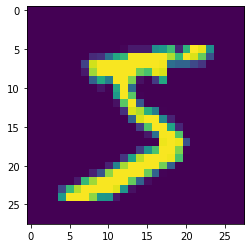

In [19]:
#visualize 1 sample
plt.imshow(X[0].reshape(28,28))
plt.show()

In [20]:
# initialize weights from sampling normal distrubition
INPUT_SIZE  = X.shape[1]
HIDDEN_SIZE = 64

w1 = np.random.normal(0, 0.01, size=(INPUT_SIZE, HIDDEN_SIZE))
w2 = np.random.normal(0, 0.01, size=(HIDDEN_SIZE, INPUT_SIZE))

**Activation Functions and Loss Function**

Here I customly write activation functions, derivative of activation functions and loss function.

In [21]:
def relu(x):
  x[x<0] = 0 #fancy index implementation, most efficient one (Vectorized Code)
  return x


def sigmoid(x):
  x = 1 / (1 + np.exp(-x))
  return x


def relu_backward(D_output, output):
    '''
    relu_backward: Backward mode of relu activation function
    
    Arguments;
    D_output: Derivative of output of relu with respect to loss.
    output  : Output of relu activation function
    
    Returns;
    Derivative of input of relu function with respect to loss.
    '''
    # output = dL/da * da/dx => D_output * output

    output[output <= 0] = 0 # d(output = 0) = undefined
    output[output > 0] = 1 

    D_output = D_output * output

    return D_output


def sigmoid_backward(D_output, output):    
    '''
    sigmoid_backward: Backward mode of sigmoid activation function
    
    Arguments;
    D_output: Derivative of output of sigmoid with respect to loss.
    output  : Output of sigmoid activation function
    
    Returns;
    Derivative of input of sigmoid function with respect to loss.
    '''
    # output = dL/da * da/dx => D_output * output
    # d σ(x) = σ(x) * 1−σ(x)

    return D_output * (output * (1 - output))

def mean_squared_error(outputs, targets):
    squared_errors = (outputs - targets)**2
    return np.mean(squared_errors)

Hypermarameters are set.

In [22]:
BATCH_SIZE = 1024
NUM_EPOCHS = 10
LEARNING_RATE = 0.0001

NUM_TRAINING_INSTANCES = X.shape[0]

ITERATIONS_PER_EPOCH = NUM_TRAINING_INSTANCES // BATCH_SIZE

Here, training procedure is defined. See how forward and backward propagation are explicitly wrote. Since variational auto encoders consists of 2 networks, we can see explicitly every step here.

Epoch 1, Iteration 0 -- Loss: 0.250320


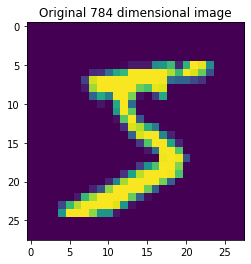

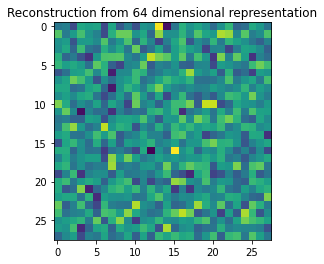

Epoch 1, Iteration 1 -- Loss: 0.159447
Epoch 1, Iteration 2 -- Loss: 0.106865
Epoch 1, Iteration 3 -- Loss: 0.076881
Epoch 1, Iteration 4 -- Loss: 0.058701
Epoch 1, Iteration 5 -- Loss: 0.046882
Epoch 1, Iteration 6 -- Loss: 0.038728
Epoch 1, Iteration 7 -- Loss: 0.032823
Epoch 1, Iteration 8 -- Loss: 0.028379
Epoch 1, Iteration 9 -- Loss: 0.024932
Epoch 1, Iteration 10 -- Loss: 0.022188


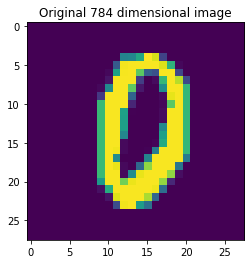

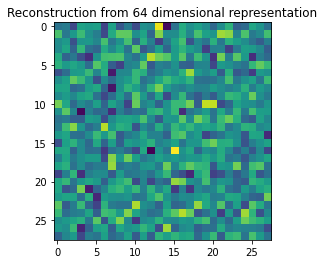

Epoch 1, Iteration 11 -- Loss: 0.019960
Epoch 1, Iteration 12 -- Loss: 0.018115
Epoch 1, Iteration 13 -- Loss: 0.016568
Epoch 1, Iteration 14 -- Loss: 0.015254
Epoch 1, Iteration 15 -- Loss: 0.014122
Epoch 1, Iteration 16 -- Loss: 0.013140
Epoch 1, Iteration 17 -- Loss: 0.012280
Epoch 1, Iteration 18 -- Loss: 0.011520
Epoch 1, Iteration 19 -- Loss: 0.010845
Epoch 1, Iteration 20 -- Loss: 0.010243


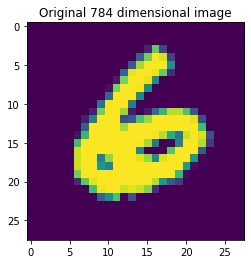

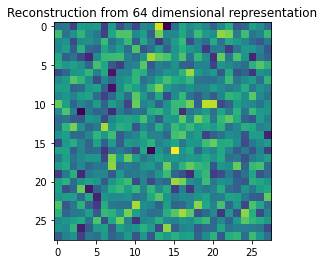

Epoch 1, Iteration 21 -- Loss: 0.009701
Epoch 1, Iteration 22 -- Loss: 0.009210
Epoch 1, Iteration 23 -- Loss: 0.008767
Epoch 1, Iteration 24 -- Loss: 0.008361
Epoch 1, Iteration 25 -- Loss: 0.007992
Epoch 1, Iteration 26 -- Loss: 0.007651
Epoch 1, Iteration 27 -- Loss: 0.007337
Epoch 1, Iteration 28 -- Loss: 0.007047
Epoch 1, Iteration 29 -- Loss: 0.006780
Epoch 1, Iteration 30 -- Loss: 0.006530


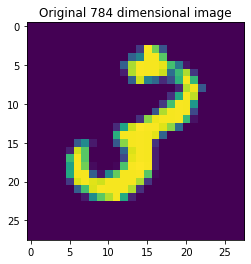

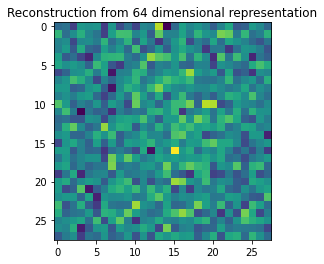

Epoch 1, Iteration 31 -- Loss: 0.006297
Epoch 1, Iteration 32 -- Loss: 0.006080
Epoch 1, Iteration 33 -- Loss: 0.005877
Epoch 1, Iteration 34 -- Loss: 0.005687
Epoch 1, Iteration 35 -- Loss: 0.005508
Epoch 1, Iteration 36 -- Loss: 0.005340
Epoch 1, Iteration 37 -- Loss: 0.005182
Epoch 1, Iteration 38 -- Loss: 0.005032
Epoch 1, Iteration 39 -- Loss: 0.004891
Epoch 1, Iteration 40 -- Loss: 0.004757


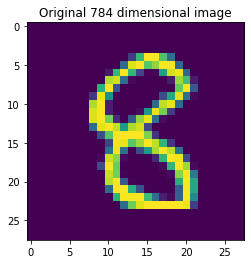

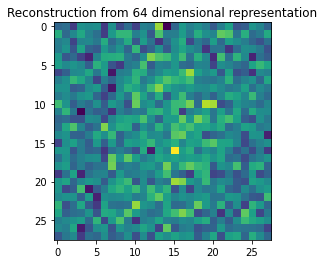

Epoch 1, Iteration 41 -- Loss: 0.004629
Epoch 1, Iteration 42 -- Loss: 0.004509
Epoch 1, Iteration 43 -- Loss: 0.004394
Epoch 1, Iteration 44 -- Loss: 0.004285
Epoch 1, Iteration 45 -- Loss: 0.004181
Epoch 1, Iteration 46 -- Loss: 0.004081
Epoch 1, Iteration 47 -- Loss: 0.003987
Epoch 1, Iteration 48 -- Loss: 0.003897
Epoch 1, Iteration 49 -- Loss: 0.003810
Epoch 1, Iteration 50 -- Loss: 0.003727


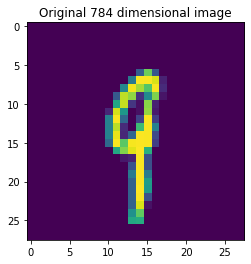

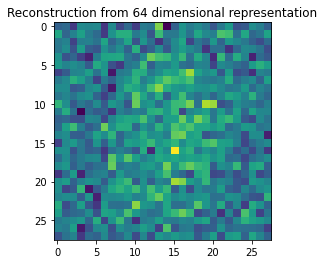

Epoch 1, Iteration 51 -- Loss: 0.003647
Epoch 1, Iteration 52 -- Loss: 0.003571
Epoch 1, Iteration 53 -- Loss: 0.003497
Epoch 1, Iteration 54 -- Loss: 0.003427
Epoch 1, Iteration 55 -- Loss: 0.003360
Epoch 1, Iteration 56 -- Loss: 0.003295
Epoch 1, Iteration 57 -- Loss: 0.003232
Epoch 2, Iteration 58 -- Loss: 0.003171


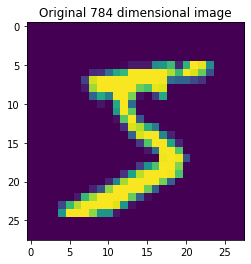

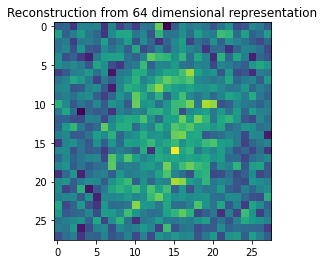

Epoch 2, Iteration 59 -- Loss: 0.003113
Epoch 2, Iteration 60 -- Loss: 0.003057
Epoch 2, Iteration 61 -- Loss: 0.003003
Epoch 2, Iteration 62 -- Loss: 0.002950
Epoch 2, Iteration 63 -- Loss: 0.002899
Epoch 2, Iteration 64 -- Loss: 0.002850
Epoch 2, Iteration 65 -- Loss: 0.002803
Epoch 2, Iteration 66 -- Loss: 0.002757
Epoch 2, Iteration 67 -- Loss: 0.002712
Epoch 2, Iteration 68 -- Loss: 0.002669


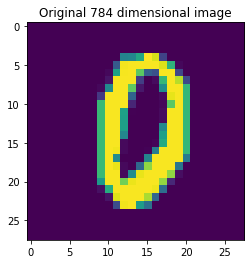

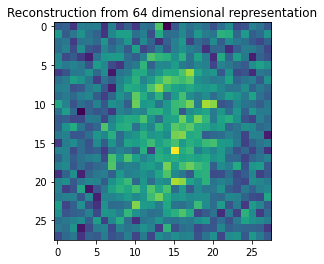

Epoch 2, Iteration 69 -- Loss: 0.002628
Epoch 2, Iteration 70 -- Loss: 0.002587
Epoch 2, Iteration 71 -- Loss: 0.002548
Epoch 2, Iteration 72 -- Loss: 0.002510
Epoch 2, Iteration 73 -- Loss: 0.002473
Epoch 2, Iteration 74 -- Loss: 0.002437
Epoch 2, Iteration 75 -- Loss: 0.002402
Epoch 2, Iteration 76 -- Loss: 0.002368
Epoch 2, Iteration 77 -- Loss: 0.002334
Epoch 2, Iteration 78 -- Loss: 0.002302


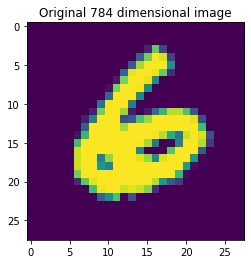

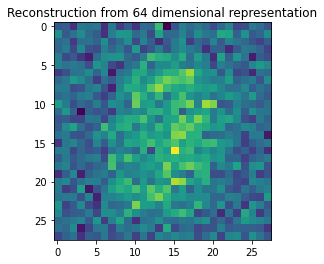

Epoch 2, Iteration 79 -- Loss: 0.002271
Epoch 2, Iteration 80 -- Loss: 0.002240
Epoch 2, Iteration 81 -- Loss: 0.002211
Epoch 2, Iteration 82 -- Loss: 0.002182
Epoch 2, Iteration 83 -- Loss: 0.002154
Epoch 2, Iteration 84 -- Loss: 0.002126
Epoch 2, Iteration 85 -- Loss: 0.002099
Epoch 2, Iteration 86 -- Loss: 0.002073
Epoch 2, Iteration 87 -- Loss: 0.002048
Epoch 2, Iteration 88 -- Loss: 0.002023


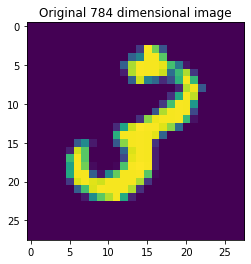

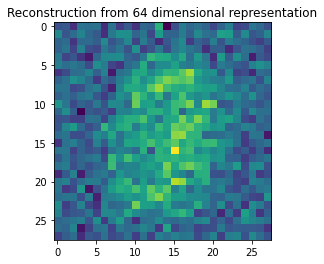

Epoch 2, Iteration 89 -- Loss: 0.001998
Epoch 2, Iteration 90 -- Loss: 0.001974
Epoch 2, Iteration 91 -- Loss: 0.001951
Epoch 2, Iteration 92 -- Loss: 0.001928
Epoch 2, Iteration 93 -- Loss: 0.001906
Epoch 2, Iteration 94 -- Loss: 0.001884
Epoch 2, Iteration 95 -- Loss: 0.001863
Epoch 2, Iteration 96 -- Loss: 0.001842
Epoch 2, Iteration 97 -- Loss: 0.001822
Epoch 2, Iteration 98 -- Loss: 0.001802


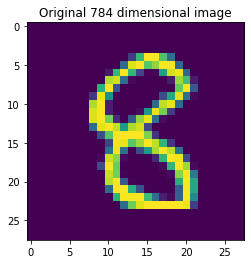

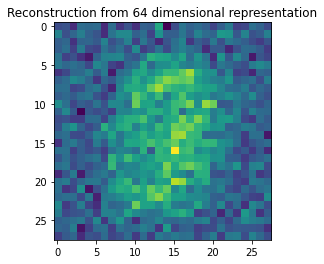

Epoch 2, Iteration 99 -- Loss: 0.001783
Epoch 2, Iteration 100 -- Loss: 0.001764
Epoch 2, Iteration 101 -- Loss: 0.001745
Epoch 2, Iteration 102 -- Loss: 0.001727
Epoch 2, Iteration 103 -- Loss: 0.001709
Epoch 2, Iteration 104 -- Loss: 0.001691
Epoch 2, Iteration 105 -- Loss: 0.001674
Epoch 2, Iteration 106 -- Loss: 0.001657
Epoch 2, Iteration 107 -- Loss: 0.001641
Epoch 2, Iteration 108 -- Loss: 0.001625


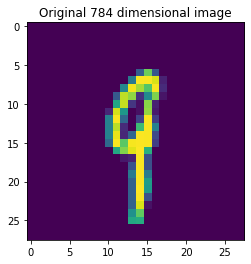

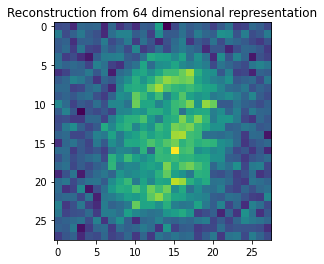

Epoch 2, Iteration 109 -- Loss: 0.001609
Epoch 2, Iteration 110 -- Loss: 0.001593
Epoch 2, Iteration 111 -- Loss: 0.001578
Epoch 2, Iteration 112 -- Loss: 0.001563
Epoch 2, Iteration 113 -- Loss: 0.001548
Epoch 2, Iteration 114 -- Loss: 0.001534
Epoch 2, Iteration 115 -- Loss: 0.001519
Epoch 3, Iteration 116 -- Loss: 0.001505


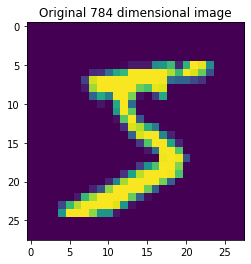

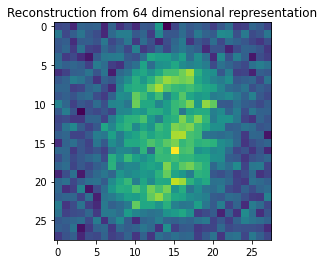

Epoch 3, Iteration 117 -- Loss: 0.001492
Epoch 3, Iteration 118 -- Loss: 0.001478
Epoch 3, Iteration 119 -- Loss: 0.001465
Epoch 3, Iteration 120 -- Loss: 0.001452
Epoch 3, Iteration 121 -- Loss: 0.001439
Epoch 3, Iteration 122 -- Loss: 0.001427
Epoch 3, Iteration 123 -- Loss: 0.001415
Epoch 3, Iteration 124 -- Loss: 0.001402
Epoch 3, Iteration 125 -- Loss: 0.001390
Epoch 3, Iteration 126 -- Loss: 0.001378


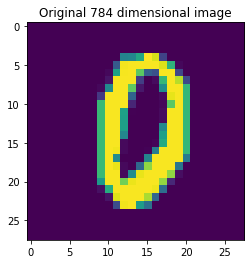

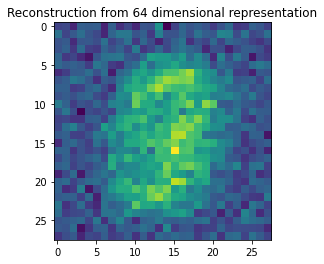

Epoch 3, Iteration 127 -- Loss: 0.001367
Epoch 3, Iteration 128 -- Loss: 0.001355
Epoch 3, Iteration 129 -- Loss: 0.001344
Epoch 3, Iteration 130 -- Loss: 0.001334
Epoch 3, Iteration 131 -- Loss: 0.001323
Epoch 3, Iteration 132 -- Loss: 0.001312
Epoch 3, Iteration 133 -- Loss: 0.001302
Epoch 3, Iteration 134 -- Loss: 0.001291
Epoch 3, Iteration 135 -- Loss: 0.001281
Epoch 3, Iteration 136 -- Loss: 0.001271


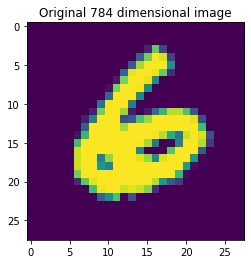

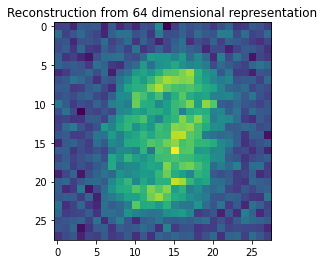

Epoch 3, Iteration 137 -- Loss: 0.001261
Epoch 3, Iteration 138 -- Loss: 0.001251
Epoch 3, Iteration 139 -- Loss: 0.001242
Epoch 3, Iteration 140 -- Loss: 0.001233
Epoch 3, Iteration 141 -- Loss: 0.001224
Epoch 3, Iteration 142 -- Loss: 0.001214
Epoch 3, Iteration 143 -- Loss: 0.001205
Epoch 3, Iteration 144 -- Loss: 0.001196
Epoch 3, Iteration 145 -- Loss: 0.001188
Epoch 3, Iteration 146 -- Loss: 0.001179


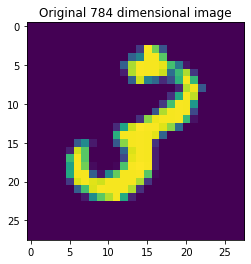

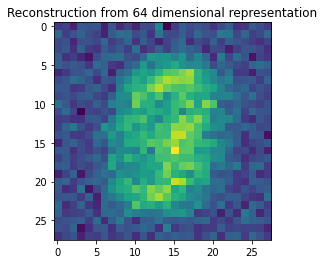

Epoch 3, Iteration 147 -- Loss: 0.001171
Epoch 3, Iteration 148 -- Loss: 0.001162
Epoch 3, Iteration 149 -- Loss: 0.001154
Epoch 3, Iteration 150 -- Loss: 0.001146
Epoch 3, Iteration 151 -- Loss: 0.001138
Epoch 3, Iteration 152 -- Loss: 0.001130
Epoch 3, Iteration 153 -- Loss: 0.001122
Epoch 3, Iteration 154 -- Loss: 0.001114
Epoch 3, Iteration 155 -- Loss: 0.001107
Epoch 3, Iteration 156 -- Loss: 0.001099


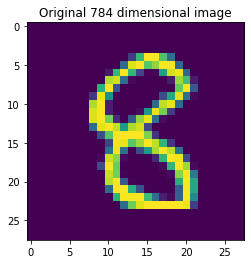

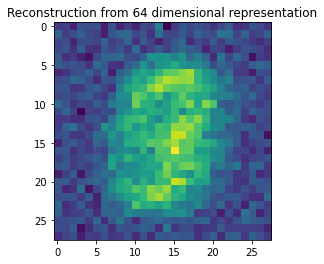

Epoch 3, Iteration 157 -- Loss: 0.001092
Epoch 3, Iteration 158 -- Loss: 0.001085
Epoch 3, Iteration 159 -- Loss: 0.001077
Epoch 3, Iteration 160 -- Loss: 0.001070
Epoch 3, Iteration 161 -- Loss: 0.001063
Epoch 3, Iteration 162 -- Loss: 0.001056
Epoch 3, Iteration 163 -- Loss: 0.001049
Epoch 3, Iteration 164 -- Loss: 0.001043
Epoch 3, Iteration 165 -- Loss: 0.001036
Epoch 3, Iteration 166 -- Loss: 0.001029


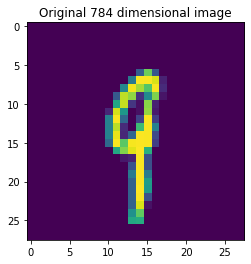

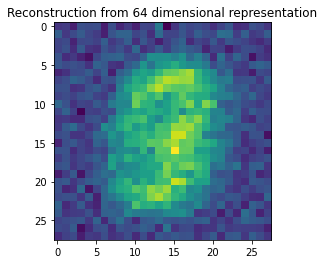

Epoch 3, Iteration 167 -- Loss: 0.001023
Epoch 3, Iteration 168 -- Loss: 0.001017
Epoch 3, Iteration 169 -- Loss: 0.001010
Epoch 3, Iteration 170 -- Loss: 0.001004
Epoch 3, Iteration 171 -- Loss: 0.000998
Epoch 3, Iteration 172 -- Loss: 0.000992
Epoch 3, Iteration 173 -- Loss: 0.000985
Epoch 4, Iteration 174 -- Loss: 0.000980


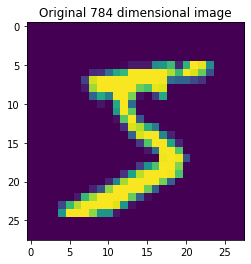

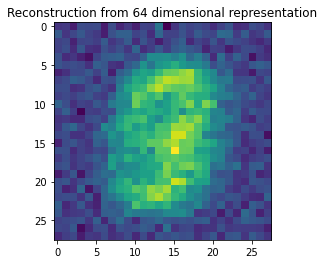

Epoch 4, Iteration 175 -- Loss: 0.000974
Epoch 4, Iteration 176 -- Loss: 0.000968
Epoch 4, Iteration 177 -- Loss: 0.000962
Epoch 4, Iteration 178 -- Loss: 0.000956
Epoch 4, Iteration 179 -- Loss: 0.000950
Epoch 4, Iteration 180 -- Loss: 0.000945
Epoch 4, Iteration 181 -- Loss: 0.000940
Epoch 4, Iteration 182 -- Loss: 0.000934
Epoch 4, Iteration 183 -- Loss: 0.000929
Epoch 4, Iteration 184 -- Loss: 0.000923


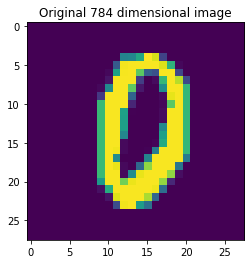

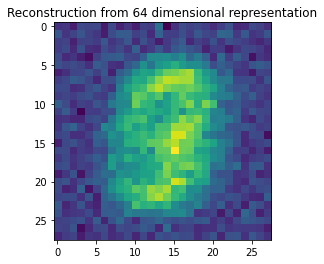

Epoch 4, Iteration 185 -- Loss: 0.000918
Epoch 4, Iteration 186 -- Loss: 0.000913
Epoch 4, Iteration 187 -- Loss: 0.000908
Epoch 4, Iteration 188 -- Loss: 0.000903
Epoch 4, Iteration 189 -- Loss: 0.000898
Epoch 4, Iteration 190 -- Loss: 0.000893
Epoch 4, Iteration 191 -- Loss: 0.000888
Epoch 4, Iteration 192 -- Loss: 0.000883
Epoch 4, Iteration 193 -- Loss: 0.000878
Epoch 4, Iteration 194 -- Loss: 0.000873


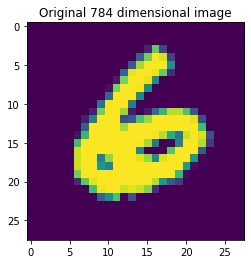

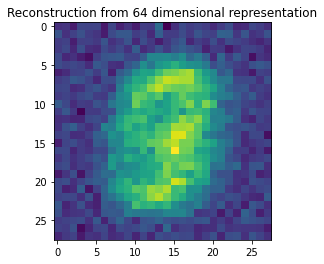

Epoch 4, Iteration 195 -- Loss: 0.000869
Epoch 4, Iteration 196 -- Loss: 0.000864
Epoch 4, Iteration 197 -- Loss: 0.000859
Epoch 4, Iteration 198 -- Loss: 0.000855
Epoch 4, Iteration 199 -- Loss: 0.000851
Epoch 4, Iteration 200 -- Loss: 0.000846
Epoch 4, Iteration 201 -- Loss: 0.000841
Epoch 4, Iteration 202 -- Loss: 0.000837
Epoch 4, Iteration 203 -- Loss: 0.000833
Epoch 4, Iteration 204 -- Loss: 0.000829


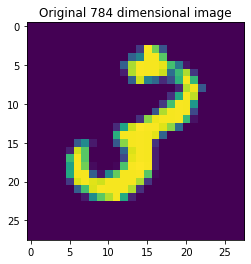

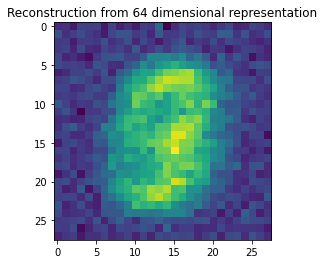

Epoch 4, Iteration 205 -- Loss: 0.000824
Epoch 4, Iteration 206 -- Loss: 0.000820
Epoch 4, Iteration 207 -- Loss: 0.000816
Epoch 4, Iteration 208 -- Loss: 0.000812
Epoch 4, Iteration 209 -- Loss: 0.000807
Epoch 4, Iteration 210 -- Loss: 0.000803
Epoch 4, Iteration 211 -- Loss: 0.000800
Epoch 4, Iteration 212 -- Loss: 0.000796
Epoch 4, Iteration 213 -- Loss: 0.000792
Epoch 4, Iteration 214 -- Loss: 0.000788


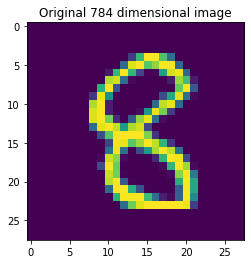

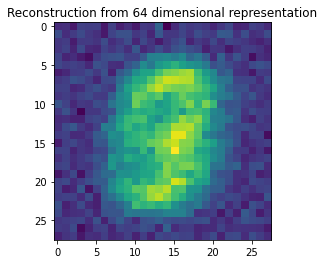

Epoch 4, Iteration 215 -- Loss: 0.000784
Epoch 4, Iteration 216 -- Loss: 0.000780
Epoch 4, Iteration 217 -- Loss: 0.000776
Epoch 4, Iteration 218 -- Loss: 0.000773
Epoch 4, Iteration 219 -- Loss: 0.000769
Epoch 4, Iteration 220 -- Loss: 0.000765
Epoch 4, Iteration 221 -- Loss: 0.000761
Epoch 4, Iteration 222 -- Loss: 0.000758
Epoch 4, Iteration 223 -- Loss: 0.000754
Epoch 4, Iteration 224 -- Loss: 0.000751


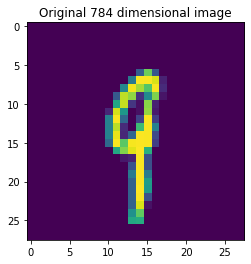

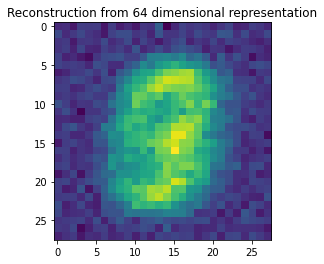

Epoch 4, Iteration 225 -- Loss: 0.000747
Epoch 4, Iteration 226 -- Loss: 0.000744
Epoch 4, Iteration 227 -- Loss: 0.000740
Epoch 4, Iteration 228 -- Loss: 0.000737
Epoch 4, Iteration 229 -- Loss: 0.000734
Epoch 4, Iteration 230 -- Loss: 0.000731
Epoch 4, Iteration 231 -- Loss: 0.000727
Epoch 5, Iteration 232 -- Loss: 0.000724


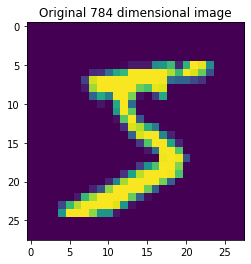

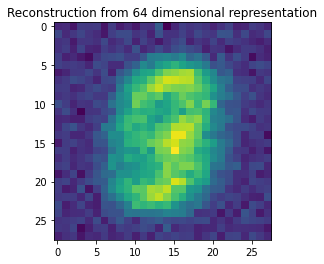

Epoch 5, Iteration 233 -- Loss: 0.000720
Epoch 5, Iteration 234 -- Loss: 0.000717
Epoch 5, Iteration 235 -- Loss: 0.000714
Epoch 5, Iteration 236 -- Loss: 0.000711
Epoch 5, Iteration 237 -- Loss: 0.000708
Epoch 5, Iteration 238 -- Loss: 0.000705
Epoch 5, Iteration 239 -- Loss: 0.000702
Epoch 5, Iteration 240 -- Loss: 0.000698
Epoch 5, Iteration 241 -- Loss: 0.000695
Epoch 5, Iteration 242 -- Loss: 0.000692


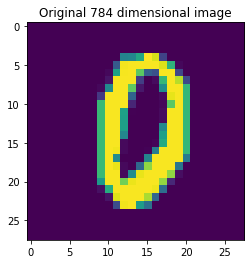

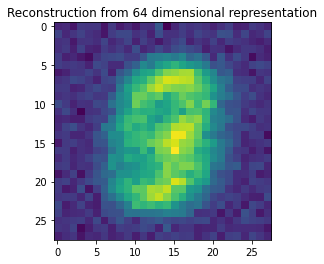

Epoch 5, Iteration 243 -- Loss: 0.000689
Epoch 5, Iteration 244 -- Loss: 0.000686
Epoch 5, Iteration 245 -- Loss: 0.000683
Epoch 5, Iteration 246 -- Loss: 0.000681
Epoch 5, Iteration 247 -- Loss: 0.000678
Epoch 5, Iteration 248 -- Loss: 0.000675
Epoch 5, Iteration 249 -- Loss: 0.000672
Epoch 5, Iteration 250 -- Loss: 0.000669
Epoch 5, Iteration 251 -- Loss: 0.000666
Epoch 5, Iteration 252 -- Loss: 0.000664


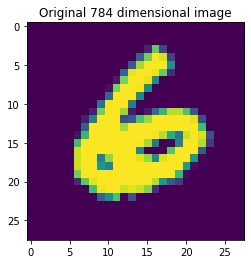

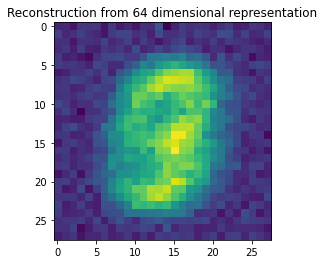

Epoch 5, Iteration 253 -- Loss: 0.000661
Epoch 5, Iteration 254 -- Loss: 0.000658
Epoch 5, Iteration 255 -- Loss: 0.000656
Epoch 5, Iteration 256 -- Loss: 0.000653
Epoch 5, Iteration 257 -- Loss: 0.000650
Epoch 5, Iteration 258 -- Loss: 0.000648
Epoch 5, Iteration 259 -- Loss: 0.000645
Epoch 5, Iteration 260 -- Loss: 0.000642
Epoch 5, Iteration 261 -- Loss: 0.000640
Epoch 5, Iteration 262 -- Loss: 0.000637


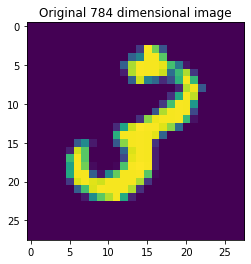

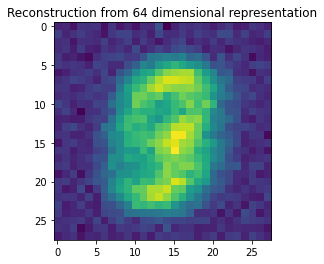

Epoch 5, Iteration 263 -- Loss: 0.000635
Epoch 5, Iteration 264 -- Loss: 0.000632
Epoch 5, Iteration 265 -- Loss: 0.000630
Epoch 5, Iteration 266 -- Loss: 0.000627
Epoch 5, Iteration 267 -- Loss: 0.000625
Epoch 5, Iteration 268 -- Loss: 0.000622
Epoch 5, Iteration 269 -- Loss: 0.000620
Epoch 5, Iteration 270 -- Loss: 0.000617
Epoch 5, Iteration 271 -- Loss: 0.000615
Epoch 5, Iteration 272 -- Loss: 0.000613


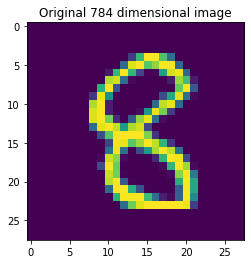

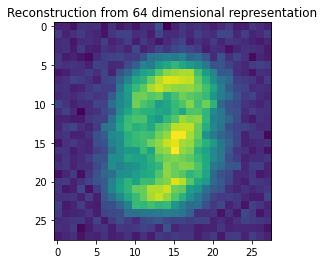

Epoch 5, Iteration 273 -- Loss: 0.000610
Epoch 5, Iteration 274 -- Loss: 0.000608
Epoch 5, Iteration 275 -- Loss: 0.000606
Epoch 5, Iteration 276 -- Loss: 0.000604
Epoch 5, Iteration 277 -- Loss: 0.000601
Epoch 5, Iteration 278 -- Loss: 0.000599
Epoch 5, Iteration 279 -- Loss: 0.000597
Epoch 5, Iteration 280 -- Loss: 0.000595
Epoch 5, Iteration 281 -- Loss: 0.000592
Epoch 5, Iteration 282 -- Loss: 0.000590


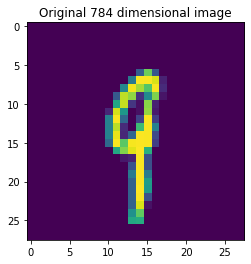

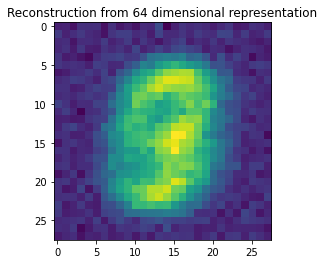

Epoch 5, Iteration 283 -- Loss: 0.000588
Epoch 5, Iteration 284 -- Loss: 0.000586
Epoch 5, Iteration 285 -- Loss: 0.000583
Epoch 5, Iteration 286 -- Loss: 0.000581
Epoch 5, Iteration 287 -- Loss: 0.000579
Epoch 5, Iteration 288 -- Loss: 0.000577
Epoch 5, Iteration 289 -- Loss: 0.000575
Epoch 6, Iteration 290 -- Loss: 0.000573


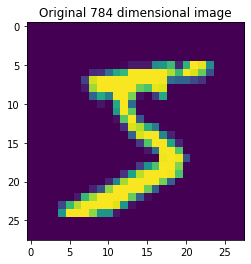

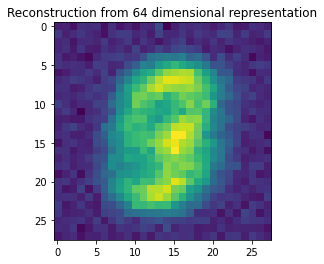

Epoch 6, Iteration 291 -- Loss: 0.000571
Epoch 6, Iteration 292 -- Loss: 0.000569
Epoch 6, Iteration 293 -- Loss: 0.000567
Epoch 6, Iteration 294 -- Loss: 0.000565
Epoch 6, Iteration 295 -- Loss: 0.000563
Epoch 6, Iteration 296 -- Loss: 0.000561
Epoch 6, Iteration 297 -- Loss: 0.000559
Epoch 6, Iteration 298 -- Loss: 0.000557
Epoch 6, Iteration 299 -- Loss: 0.000555
Epoch 6, Iteration 300 -- Loss: 0.000553


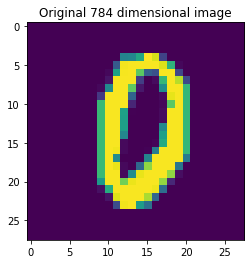

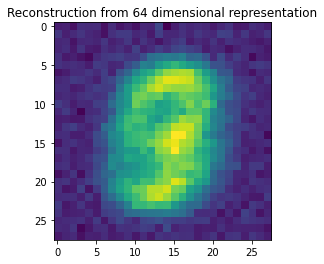

Epoch 6, Iteration 301 -- Loss: 0.000551
Epoch 6, Iteration 302 -- Loss: 0.000549
Epoch 6, Iteration 303 -- Loss: 0.000547
Epoch 6, Iteration 304 -- Loss: 0.000546
Epoch 6, Iteration 305 -- Loss: 0.000544
Epoch 6, Iteration 306 -- Loss: 0.000542
Epoch 6, Iteration 307 -- Loss: 0.000540
Epoch 6, Iteration 308 -- Loss: 0.000538
Epoch 6, Iteration 309 -- Loss: 0.000536
Epoch 6, Iteration 310 -- Loss: 0.000534


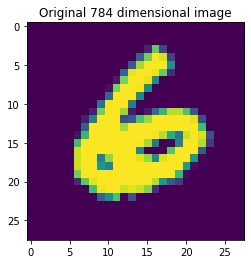

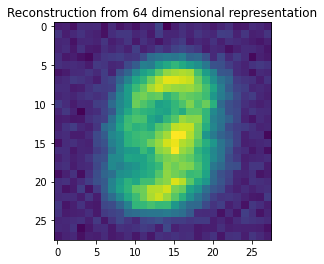

Epoch 6, Iteration 311 -- Loss: 0.000533
Epoch 6, Iteration 312 -- Loss: 0.000531
Epoch 6, Iteration 313 -- Loss: 0.000529
Epoch 6, Iteration 314 -- Loss: 0.000527
Epoch 6, Iteration 315 -- Loss: 0.000526
Epoch 6, Iteration 316 -- Loss: 0.000524
Epoch 6, Iteration 317 -- Loss: 0.000522
Epoch 6, Iteration 318 -- Loss: 0.000520
Epoch 6, Iteration 319 -- Loss: 0.000519
Epoch 6, Iteration 320 -- Loss: 0.000517


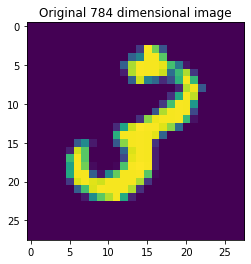

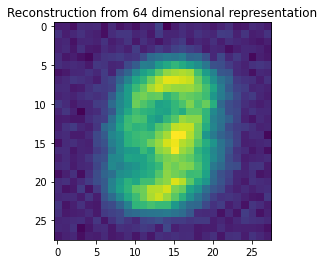

Epoch 6, Iteration 321 -- Loss: 0.000515
Epoch 6, Iteration 322 -- Loss: 0.000514
Epoch 6, Iteration 323 -- Loss: 0.000512
Epoch 6, Iteration 324 -- Loss: 0.000510
Epoch 6, Iteration 325 -- Loss: 0.000509
Epoch 6, Iteration 326 -- Loss: 0.000507
Epoch 6, Iteration 327 -- Loss: 0.000506
Epoch 6, Iteration 328 -- Loss: 0.000504
Epoch 6, Iteration 329 -- Loss: 0.000502
Epoch 6, Iteration 330 -- Loss: 0.000501


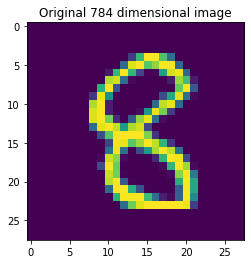

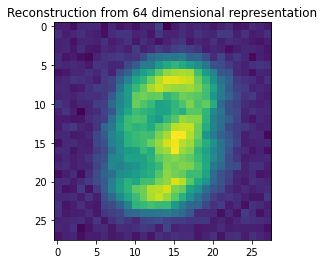

Epoch 6, Iteration 331 -- Loss: 0.000499
Epoch 6, Iteration 332 -- Loss: 0.000498
Epoch 6, Iteration 333 -- Loss: 0.000496
Epoch 6, Iteration 334 -- Loss: 0.000495
Epoch 6, Iteration 335 -- Loss: 0.000493
Epoch 6, Iteration 336 -- Loss: 0.000491
Epoch 6, Iteration 337 -- Loss: 0.000490
Epoch 6, Iteration 338 -- Loss: 0.000489
Epoch 6, Iteration 339 -- Loss: 0.000487
Epoch 6, Iteration 340 -- Loss: 0.000486


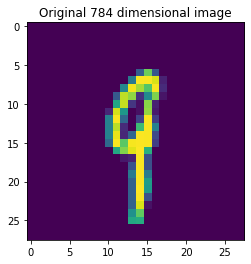

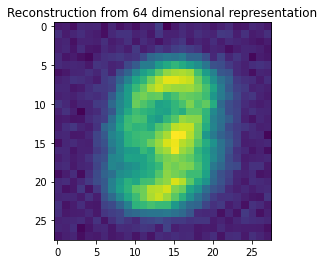

Epoch 6, Iteration 341 -- Loss: 0.000484
Epoch 6, Iteration 342 -- Loss: 0.000483
Epoch 6, Iteration 343 -- Loss: 0.000481
Epoch 6, Iteration 344 -- Loss: 0.000480
Epoch 6, Iteration 345 -- Loss: 0.000478
Epoch 6, Iteration 346 -- Loss: 0.000477
Epoch 6, Iteration 347 -- Loss: 0.000475
Epoch 7, Iteration 348 -- Loss: 0.000474


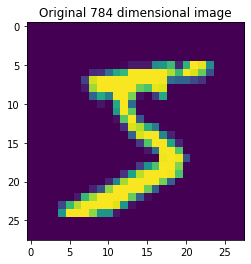

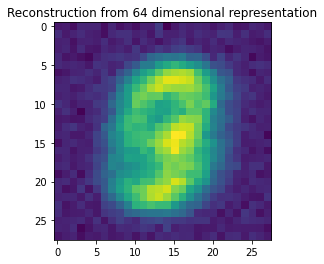

Epoch 7, Iteration 349 -- Loss: 0.000472
Epoch 7, Iteration 350 -- Loss: 0.000471
Epoch 7, Iteration 351 -- Loss: 0.000470
Epoch 7, Iteration 352 -- Loss: 0.000468
Epoch 7, Iteration 353 -- Loss: 0.000467
Epoch 7, Iteration 354 -- Loss: 0.000466
Epoch 7, Iteration 355 -- Loss: 0.000464
Epoch 7, Iteration 356 -- Loss: 0.000463
Epoch 7, Iteration 357 -- Loss: 0.000461
Epoch 7, Iteration 358 -- Loss: 0.000460


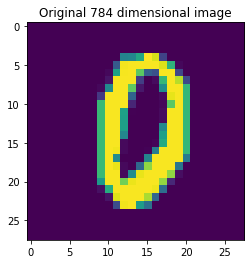

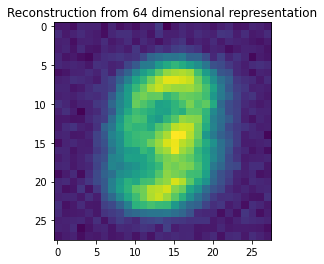

Epoch 7, Iteration 359 -- Loss: 0.000459
Epoch 7, Iteration 360 -- Loss: 0.000457
Epoch 7, Iteration 361 -- Loss: 0.000456
Epoch 7, Iteration 362 -- Loss: 0.000455
Epoch 7, Iteration 363 -- Loss: 0.000454
Epoch 7, Iteration 364 -- Loss: 0.000452
Epoch 7, Iteration 365 -- Loss: 0.000451
Epoch 7, Iteration 366 -- Loss: 0.000450
Epoch 7, Iteration 367 -- Loss: 0.000448
Epoch 7, Iteration 368 -- Loss: 0.000447


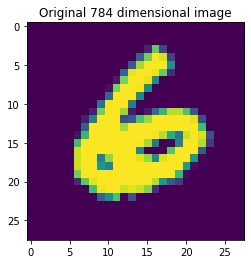

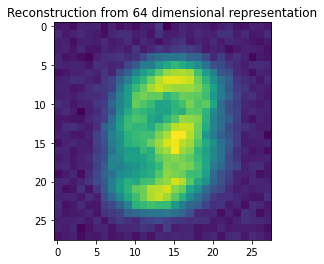

Epoch 7, Iteration 369 -- Loss: 0.000446
Epoch 7, Iteration 370 -- Loss: 0.000444
Epoch 7, Iteration 371 -- Loss: 0.000443
Epoch 7, Iteration 372 -- Loss: 0.000442
Epoch 7, Iteration 373 -- Loss: 0.000441
Epoch 7, Iteration 374 -- Loss: 0.000440
Epoch 7, Iteration 375 -- Loss: 0.000438
Epoch 7, Iteration 376 -- Loss: 0.000437
Epoch 7, Iteration 377 -- Loss: 0.000436
Epoch 7, Iteration 378 -- Loss: 0.000435


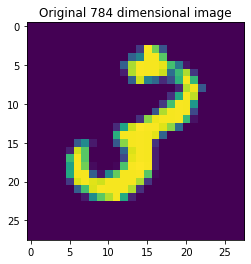

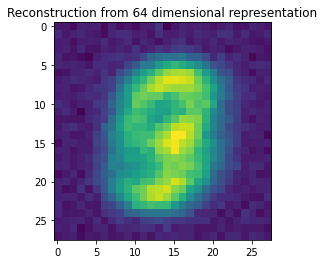

Epoch 7, Iteration 379 -- Loss: 0.000434
Epoch 7, Iteration 380 -- Loss: 0.000432
Epoch 7, Iteration 381 -- Loss: 0.000431
Epoch 7, Iteration 382 -- Loss: 0.000430
Epoch 7, Iteration 383 -- Loss: 0.000429
Epoch 7, Iteration 384 -- Loss: 0.000428
Epoch 7, Iteration 385 -- Loss: 0.000427
Epoch 7, Iteration 386 -- Loss: 0.000425
Epoch 7, Iteration 387 -- Loss: 0.000424
Epoch 7, Iteration 388 -- Loss: 0.000423


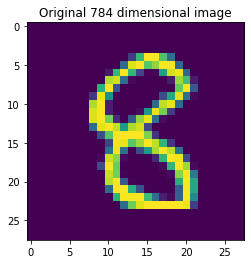

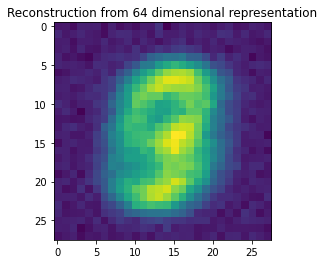

Epoch 7, Iteration 389 -- Loss: 0.000422
Epoch 7, Iteration 390 -- Loss: 0.000421
Epoch 7, Iteration 391 -- Loss: 0.000420
Epoch 7, Iteration 392 -- Loss: 0.000419
Epoch 7, Iteration 393 -- Loss: 0.000418
Epoch 7, Iteration 394 -- Loss: 0.000416
Epoch 7, Iteration 395 -- Loss: 0.000415
Epoch 7, Iteration 396 -- Loss: 0.000414
Epoch 7, Iteration 397 -- Loss: 0.000413
Epoch 7, Iteration 398 -- Loss: 0.000412


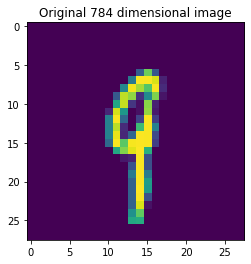

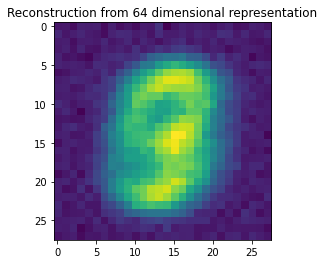

Epoch 7, Iteration 399 -- Loss: 0.000411
Epoch 7, Iteration 400 -- Loss: 0.000410
Epoch 7, Iteration 401 -- Loss: 0.000409
Epoch 7, Iteration 402 -- Loss: 0.000408
Epoch 7, Iteration 403 -- Loss: 0.000407
Epoch 7, Iteration 404 -- Loss: 0.000406
Epoch 7, Iteration 405 -- Loss: 0.000405
Epoch 8, Iteration 406 -- Loss: 0.000404


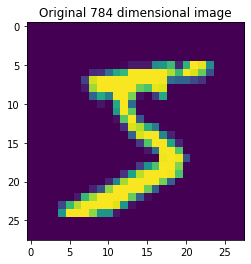

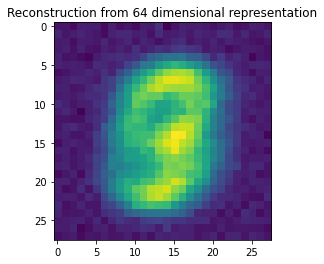

Epoch 8, Iteration 407 -- Loss: 0.000403
Epoch 8, Iteration 408 -- Loss: 0.000402
Epoch 8, Iteration 409 -- Loss: 0.000401
Epoch 8, Iteration 410 -- Loss: 0.000400
Epoch 8, Iteration 411 -- Loss: 0.000398
Epoch 8, Iteration 412 -- Loss: 0.000398
Epoch 8, Iteration 413 -- Loss: 0.000397
Epoch 8, Iteration 414 -- Loss: 0.000396
Epoch 8, Iteration 415 -- Loss: 0.000395
Epoch 8, Iteration 416 -- Loss: 0.000393


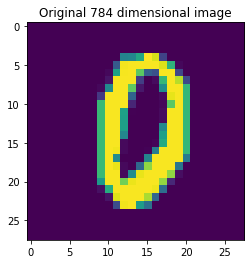

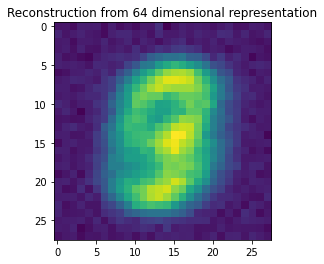

Epoch 8, Iteration 417 -- Loss: 0.000393
Epoch 8, Iteration 418 -- Loss: 0.000392
Epoch 8, Iteration 419 -- Loss: 0.000391
Epoch 8, Iteration 420 -- Loss: 0.000390
Epoch 8, Iteration 421 -- Loss: 0.000389
Epoch 8, Iteration 422 -- Loss: 0.000388
Epoch 8, Iteration 423 -- Loss: 0.000387
Epoch 8, Iteration 424 -- Loss: 0.000386
Epoch 8, Iteration 425 -- Loss: 0.000385
Epoch 8, Iteration 426 -- Loss: 0.000384


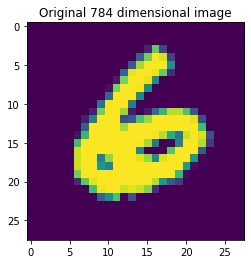

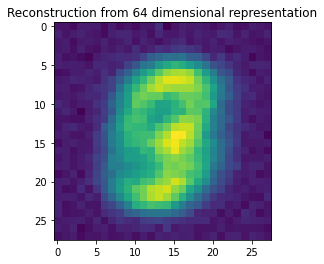

Epoch 8, Iteration 427 -- Loss: 0.000383
Epoch 8, Iteration 428 -- Loss: 0.000382
Epoch 8, Iteration 429 -- Loss: 0.000381
Epoch 8, Iteration 430 -- Loss: 0.000380
Epoch 8, Iteration 431 -- Loss: 0.000380
Epoch 8, Iteration 432 -- Loss: 0.000378
Epoch 8, Iteration 433 -- Loss: 0.000377
Epoch 8, Iteration 434 -- Loss: 0.000377
Epoch 8, Iteration 435 -- Loss: 0.000376
Epoch 8, Iteration 436 -- Loss: 0.000375


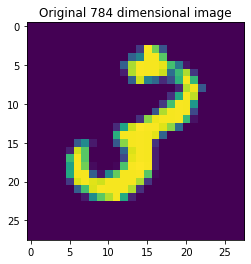

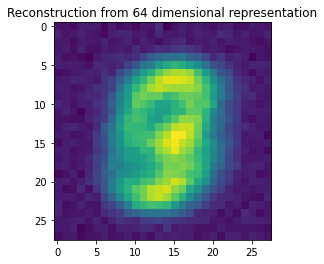

Epoch 8, Iteration 437 -- Loss: 0.000374
Epoch 8, Iteration 438 -- Loss: 0.000373
Epoch 8, Iteration 439 -- Loss: 0.000372
Epoch 8, Iteration 440 -- Loss: 0.000371
Epoch 8, Iteration 441 -- Loss: 0.000370
Epoch 8, Iteration 442 -- Loss: 0.000370
Epoch 8, Iteration 443 -- Loss: 0.000369
Epoch 8, Iteration 444 -- Loss: 0.000368
Epoch 8, Iteration 445 -- Loss: 0.000367
Epoch 8, Iteration 446 -- Loss: 0.000366


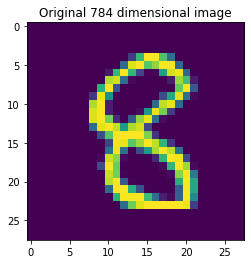

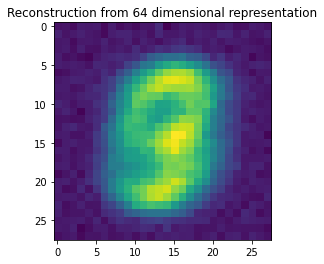

Epoch 8, Iteration 447 -- Loss: 0.000365
Epoch 8, Iteration 448 -- Loss: 0.000365
Epoch 8, Iteration 449 -- Loss: 0.000364
Epoch 8, Iteration 450 -- Loss: 0.000363
Epoch 8, Iteration 451 -- Loss: 0.000362
Epoch 8, Iteration 452 -- Loss: 0.000361
Epoch 8, Iteration 453 -- Loss: 0.000360
Epoch 8, Iteration 454 -- Loss: 0.000360
Epoch 8, Iteration 455 -- Loss: 0.000359
Epoch 8, Iteration 456 -- Loss: 0.000358


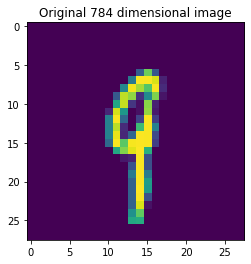

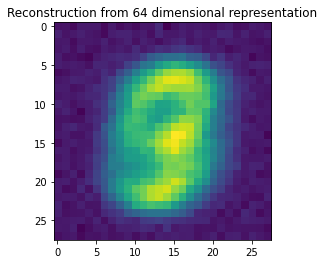

Epoch 8, Iteration 457 -- Loss: 0.000357
Epoch 8, Iteration 458 -- Loss: 0.000356
Epoch 8, Iteration 459 -- Loss: 0.000355
Epoch 8, Iteration 460 -- Loss: 0.000355
Epoch 8, Iteration 461 -- Loss: 0.000354
Epoch 8, Iteration 462 -- Loss: 0.000353
Epoch 8, Iteration 463 -- Loss: 0.000352
Epoch 9, Iteration 464 -- Loss: 0.000352


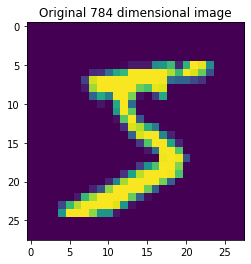

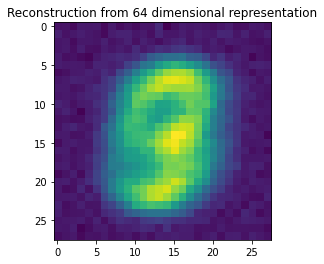

Epoch 9, Iteration 465 -- Loss: 0.000351
Epoch 9, Iteration 466 -- Loss: 0.000350
Epoch 9, Iteration 467 -- Loss: 0.000349
Epoch 9, Iteration 468 -- Loss: 0.000348
Epoch 9, Iteration 469 -- Loss: 0.000347
Epoch 9, Iteration 470 -- Loss: 0.000347
Epoch 9, Iteration 471 -- Loss: 0.000346
Epoch 9, Iteration 472 -- Loss: 0.000345
Epoch 9, Iteration 473 -- Loss: 0.000345
Epoch 9, Iteration 474 -- Loss: 0.000344


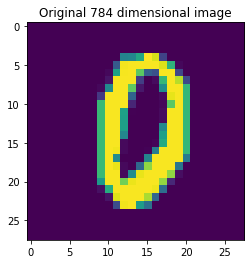

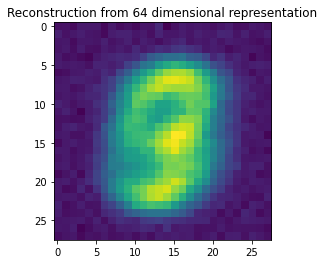

Epoch 9, Iteration 475 -- Loss: 0.000343
Epoch 9, Iteration 476 -- Loss: 0.000342
Epoch 9, Iteration 477 -- Loss: 0.000341
Epoch 9, Iteration 478 -- Loss: 0.000341
Epoch 9, Iteration 479 -- Loss: 0.000340
Epoch 9, Iteration 480 -- Loss: 0.000339
Epoch 9, Iteration 481 -- Loss: 0.000339
Epoch 9, Iteration 482 -- Loss: 0.000338
Epoch 9, Iteration 483 -- Loss: 0.000337
Epoch 9, Iteration 484 -- Loss: 0.000336


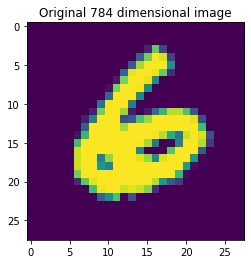

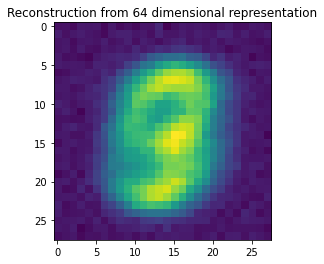

Epoch 9, Iteration 485 -- Loss: 0.000336
Epoch 9, Iteration 486 -- Loss: 0.000335
Epoch 9, Iteration 487 -- Loss: 0.000334
Epoch 9, Iteration 488 -- Loss: 0.000334
Epoch 9, Iteration 489 -- Loss: 0.000333
Epoch 9, Iteration 490 -- Loss: 0.000332
Epoch 9, Iteration 491 -- Loss: 0.000331
Epoch 9, Iteration 492 -- Loss: 0.000331
Epoch 9, Iteration 493 -- Loss: 0.000330
Epoch 9, Iteration 494 -- Loss: 0.000330


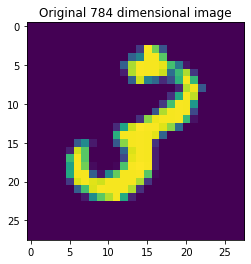

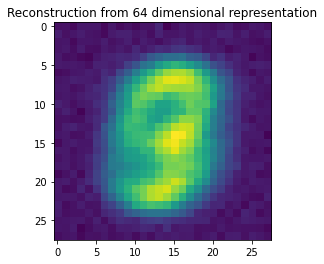

Epoch 9, Iteration 495 -- Loss: 0.000329
Epoch 9, Iteration 496 -- Loss: 0.000328
Epoch 9, Iteration 497 -- Loss: 0.000327
Epoch 9, Iteration 498 -- Loss: 0.000327
Epoch 9, Iteration 499 -- Loss: 0.000326
Epoch 9, Iteration 500 -- Loss: 0.000325
Epoch 9, Iteration 501 -- Loss: 0.000325
Epoch 9, Iteration 502 -- Loss: 0.000324
Epoch 9, Iteration 503 -- Loss: 0.000323
Epoch 9, Iteration 504 -- Loss: 0.000323


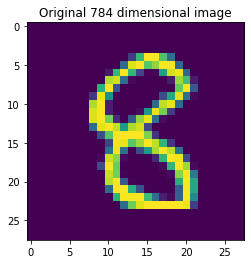

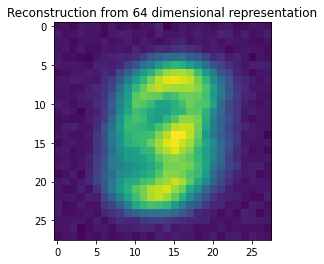

Epoch 9, Iteration 505 -- Loss: 0.000322
Epoch 9, Iteration 506 -- Loss: 0.000321
Epoch 9, Iteration 507 -- Loss: 0.000321
Epoch 9, Iteration 508 -- Loss: 0.000320
Epoch 9, Iteration 509 -- Loss: 0.000319
Epoch 9, Iteration 510 -- Loss: 0.000319
Epoch 9, Iteration 511 -- Loss: 0.000318
Epoch 9, Iteration 512 -- Loss: 0.000317
Epoch 9, Iteration 513 -- Loss: 0.000317
Epoch 9, Iteration 514 -- Loss: 0.000316


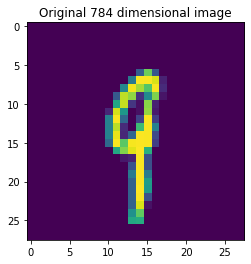

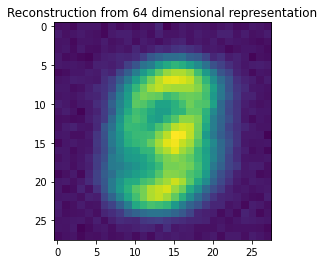

Epoch 9, Iteration 515 -- Loss: 0.000316
Epoch 9, Iteration 516 -- Loss: 0.000315
Epoch 9, Iteration 517 -- Loss: 0.000314
Epoch 9, Iteration 518 -- Loss: 0.000314
Epoch 9, Iteration 519 -- Loss: 0.000313
Epoch 9, Iteration 520 -- Loss: 0.000312
Epoch 9, Iteration 521 -- Loss: 0.000312
Epoch 10, Iteration 522 -- Loss: 0.000311


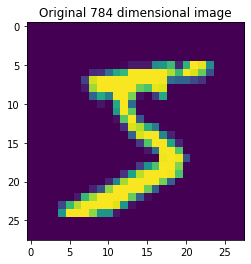

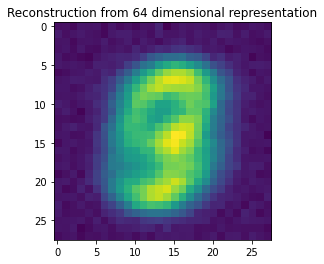

Epoch 10, Iteration 523 -- Loss: 0.000310
Epoch 10, Iteration 524 -- Loss: 0.000310
Epoch 10, Iteration 525 -- Loss: 0.000309
Epoch 10, Iteration 526 -- Loss: 0.000309
Epoch 10, Iteration 527 -- Loss: 0.000308
Epoch 10, Iteration 528 -- Loss: 0.000307
Epoch 10, Iteration 529 -- Loss: 0.000307
Epoch 10, Iteration 530 -- Loss: 0.000306
Epoch 10, Iteration 531 -- Loss: 0.000306
Epoch 10, Iteration 532 -- Loss: 0.000305


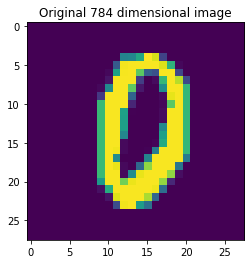

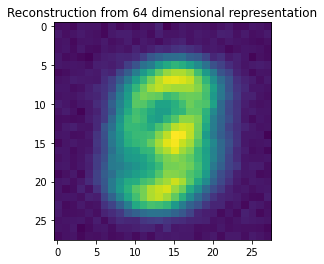

Epoch 10, Iteration 533 -- Loss: 0.000304
Epoch 10, Iteration 534 -- Loss: 0.000304
Epoch 10, Iteration 535 -- Loss: 0.000303
Epoch 10, Iteration 536 -- Loss: 0.000303
Epoch 10, Iteration 537 -- Loss: 0.000302
Epoch 10, Iteration 538 -- Loss: 0.000302
Epoch 10, Iteration 539 -- Loss: 0.000301
Epoch 10, Iteration 540 -- Loss: 0.000300
Epoch 10, Iteration 541 -- Loss: 0.000300
Epoch 10, Iteration 542 -- Loss: 0.000299


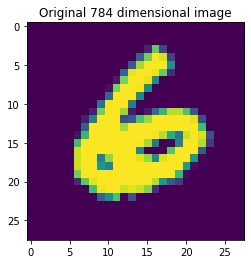

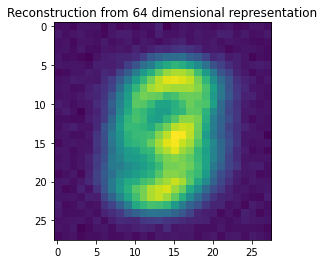

Epoch 10, Iteration 543 -- Loss: 0.000299
Epoch 10, Iteration 544 -- Loss: 0.000298
Epoch 10, Iteration 545 -- Loss: 0.000298
Epoch 10, Iteration 546 -- Loss: 0.000297
Epoch 10, Iteration 547 -- Loss: 0.000297
Epoch 10, Iteration 548 -- Loss: 0.000296
Epoch 10, Iteration 549 -- Loss: 0.000295
Epoch 10, Iteration 550 -- Loss: 0.000295
Epoch 10, Iteration 551 -- Loss: 0.000294
Epoch 10, Iteration 552 -- Loss: 0.000294


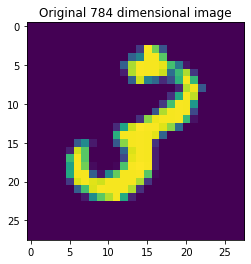

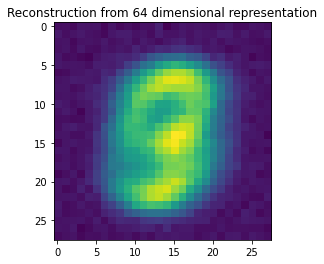

Epoch 10, Iteration 553 -- Loss: 0.000293
Epoch 10, Iteration 554 -- Loss: 0.000293
Epoch 10, Iteration 555 -- Loss: 0.000292
Epoch 10, Iteration 556 -- Loss: 0.000291
Epoch 10, Iteration 557 -- Loss: 0.000291
Epoch 10, Iteration 558 -- Loss: 0.000290
Epoch 10, Iteration 559 -- Loss: 0.000290
Epoch 10, Iteration 560 -- Loss: 0.000289
Epoch 10, Iteration 561 -- Loss: 0.000289
Epoch 10, Iteration 562 -- Loss: 0.000288


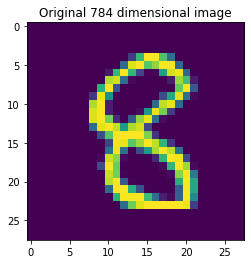

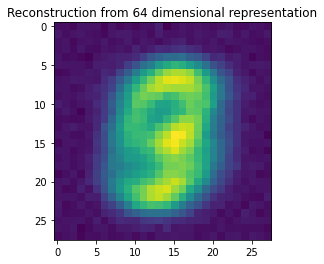

Epoch 10, Iteration 563 -- Loss: 0.000288
Epoch 10, Iteration 564 -- Loss: 0.000287
Epoch 10, Iteration 565 -- Loss: 0.000287
Epoch 10, Iteration 566 -- Loss: 0.000286
Epoch 10, Iteration 567 -- Loss: 0.000286
Epoch 10, Iteration 568 -- Loss: 0.000285
Epoch 10, Iteration 569 -- Loss: 0.000284
Epoch 10, Iteration 570 -- Loss: 0.000284
Epoch 10, Iteration 571 -- Loss: 0.000284
Epoch 10, Iteration 572 -- Loss: 0.000283


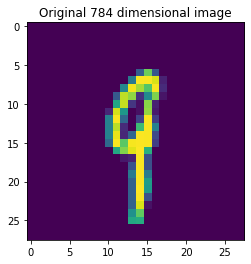

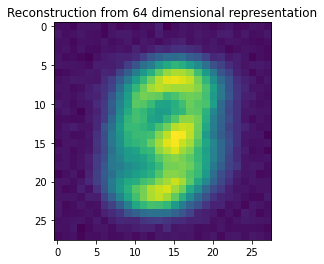

Epoch 10, Iteration 573 -- Loss: 0.000283
Epoch 10, Iteration 574 -- Loss: 0.000282
Epoch 10, Iteration 575 -- Loss: 0.000281
Epoch 10, Iteration 576 -- Loss: 0.000281
Epoch 10, Iteration 577 -- Loss: 0.000281
Epoch 10, Iteration 578 -- Loss: 0.000280
Epoch 10, Iteration 579 -- Loss: 0.000280


In [23]:
for epoch in range(NUM_EPOCHS): 
    for n in range(ITERATIONS_PER_EPOCH):
        
        ## Sample batch from dataset
        batch_indices = range(n*BATCH_SIZE, n*BATCH_SIZE + BATCH_SIZE)   
        X_batch = X[batch_indices]
        
        ## Forward propagation
        h1 = np.matmul(X_batch, w1) # before activation, just summation (W*x)
        o1 = sigmoid(h1) # after activation of 1.layer
        #o1 = relu(h1)
        
        h2 = np.matmul(o1, w2)
        o2 = sigmoid(h2)
        
      
        
        loss = mean_squared_error(o2, X_batch)
        
        print('Epoch %d, Iteration %d -- Loss: %.6f' % (epoch + 1, epoch * ITERATIONS_PER_EPOCH + n, loss))
            
        ## Backpropagation
        
        D_o2 = 2 * (o2 - X_batch) # Can you explain why?
        # Because D_o2 is derivative of o2 w.r.t Loss function,
        # Since MSE is error**2, derivative of it is:
        # 2 * error
        
        D_h2 = sigmoid_backward(D_o2, o2) 
        
        D_o1 = np.matmul(D_h2, w2.T)
        D_w2 = np.matmul(o1.T, D_h2)
        
        D_h1 = sigmoid_backward(D_o1, o1) 
        #D_h1 = relu_backward(D_o1, o1) 
        
        #D_o1 = D_o2 * D_h2 * w2
        D_w1 = np.matmul( X_batch.T, D_h1 )
        
        
        ## Parameter updates
        w1 -= D_w1 * LEARNING_RATE
        w2 -= D_w2 * LEARNING_RATE
        
        
        if n % 10 == 0:
            plt.figure()
            plt.title('Original %d dimensional image' % INPUT_SIZE)
            plt.imshow(X_batch[0].reshape(28, 28)); plt.show()
            
            
            plt.figure()
            plt.title('Reconstruction from %d dimensional representation' % HIDDEN_SIZE)
            plt.imshow(o2[0].reshape(28, 28)); plt.show()
        
    

**Inference**

First, lets look at shapes of these vectors. 784 dimension images are compressed into 64 dimension latent feature vectors.

In [24]:
D_w1.shape , D_w2.shape , w1.shape , w2.shape

((784, 64), (64, 784), (784, 64), (64, 784))

In [25]:
o1.shape, o2.shape , h1.shape, h2.shape

((1024, 64), (1024, 784), (1024, 64), (1024, 784))

Here we can see reconstructed images randomly selected from samples. We can see that even though latent representations of images are different, output images are almost same. However, the outputs are not same, and we can verify it by comparing two vectors if they are equal or not.


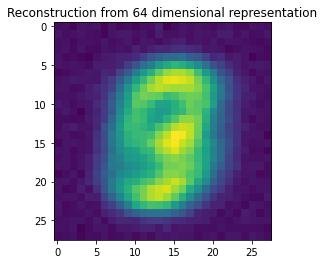

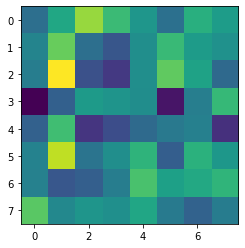

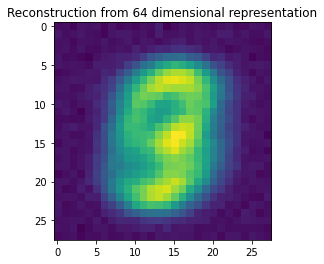

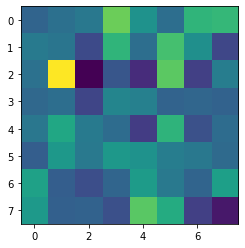

False
False


In [26]:
h1 = np.matmul(X[200], w1) # before activation, just summation (W*x)
o1 = sigmoid(h1) # after activation of 1.layer
        
h2 = np.matmul(o1, w2)
o2 = sigmoid(h2)

o2.reshape(784,1)
plt.figure()
plt.title('Reconstruction from %d dimensional representation' % HIDDEN_SIZE)

plt.imshow(o2.reshape(28, 28)); plt.show()
plt.imshow(o1.reshape(8, 8)); plt.show()

h1 = np.matmul(X[300], w1) # before activation, just summation (W*x)
o1a = sigmoid(h1) # after activation of 1.layer

        
h2 = np.matmul(o1a, w2)
o2a = sigmoid(h2)

o2.reshape(784,1)
plt.figure()
plt.title('Reconstruction from %d dimensional representation' % HIDDEN_SIZE)
plt.imshow(o2a.reshape(28, 28)); plt.show()
plt.imshow(o1a.reshape(8, 8)); plt.show()

print(np.array_equal(o2,o2a))
print(np.array_equal(o1,o1a))

At the end, we can see the visualisation of input images.

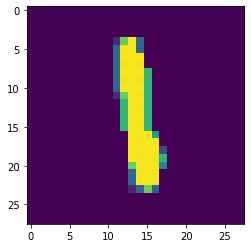

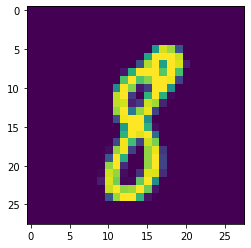

In [27]:
plt.imshow(X[200].reshape(28,28))
plt.show()

plt.imshow(X[300].reshape(28,28))
plt.show()